# Comparar tiempos de ejecución para lecturas de archivos geojson #28

Los resultados que se presentan en esta notebook son basados en la misma cantidad de objetos obtenidos a partir de ECATEPEC.json 

# Librería json en Python para deserializar solo coordenadas

Usando la libreria de json en python podemos deserializar los objetos completos en el codigo, pero para este ejemplo solo vamos a importar la propiedad de "coordinates"para usarla en los algoritmos actuales.
La funcion cuenta con el timer dentro para medir con exactitud la velocidad con la que deserializa n objetos.

In [1]:
# Since the JSON file contains multiple JSON objects within a single list, 
# we can read the entire file into memory and parse it as a list of dictionaries.
# Load just coordinates property 

import json
import time
import matplotlib.pyplot as plt

def load_n_coordinates_from_json_file(file_path, n):
    start_time = time.time()  # Start the timer
    
    coordinates_list = []
    with open(file_path, 'r') as file:
        data = json.load(file)  # Load the entire JSON file
        
        for i in range(min(n, len(data))):
            obj = data[i]
            # Extract coordinates
            coordinates = obj["features"][0]["geometry"]["coordinates"]
            coordinates_list.append(coordinates)
    
    end_time = time.time()  # End the timer
    elapsed_time = end_time - start_time  # Calculate the elapsed time
    
    return coordinates_list, elapsed_time


La siguiente funcion es para graficar los tiempos de ejecucion en la carga de objetos, automatiza la tarea recibiendo un "upper_bound" y "step_size" el primero es para establecer el limite de objetos a cargar y el segundo es para mejorar la definicion de la grafica final.

In [29]:
def plot_time_vs_step_size(file_path, upper_bound, step_size):
    """Plots the time it takes to load n coordinates from a JSON file for increasing values of n.

    Args:
        file_path (str): The path to the JSON file.
        upper_bound (int): The maximum number of coordinates to load.
        step_size (int): The increment between each measurement.
    """

    n_values = range(step_size, upper_bound + 1, step_size)
    times = []

    for n in n_values:
        _, elapsed_time = load_n_coordinates_from_json_file(file_path, n)
        times.append(elapsed_time)

    plt.plot(n_values, times)
    plt.xlabel("Number of Coordinates (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Time Loading " + str(upper_bound) + " Coordinates")
    plt.grid(True)
    plt.show()

Ejecutamos las pruebas (1000, 2000, 3000)

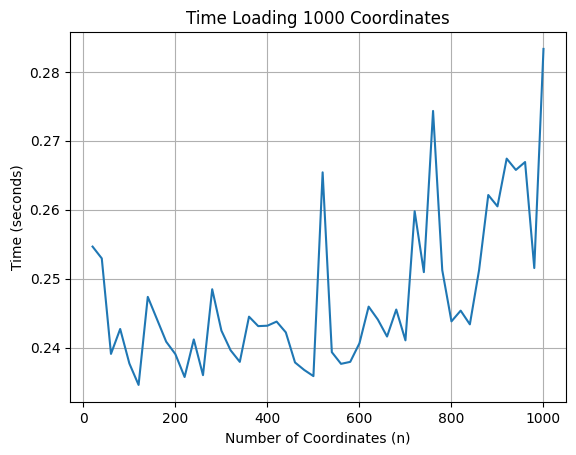

In [16]:
# Example 1000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 1000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)


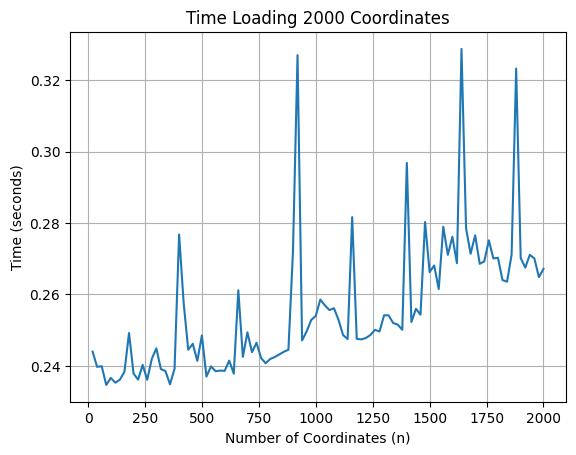

In [18]:
# Example 2000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 2000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)


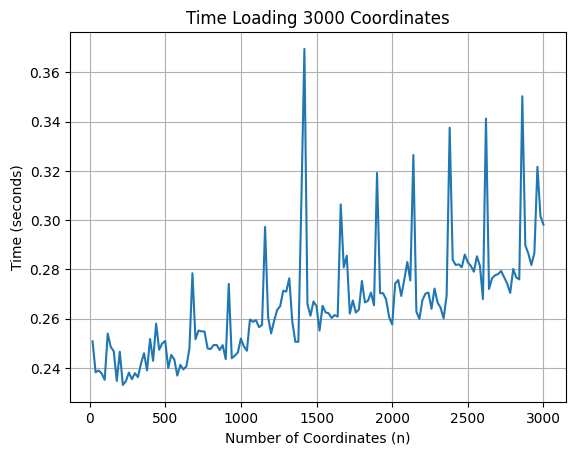

In [14]:
# Example 3000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 3000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)


# Librería json en Python para deserializar objetos completos

Este codigo es para deserializar los objetos completos en caso de que sea necesario usar mas que solo la propiedad "coordinates" y tambien para ver si ezxiste algun cambio en 

In [27]:
# Since the JSON file contains multiple JSON objects within a single list, 
# we can read the entire file into memory and parse it as a list of dictionaries.
# Load entire object

import json
import time
import matplotlib.pyplot as plt

def load_n_objects_from_json_file(file_path, n):
    start_time = time.time()  # Start the timer
    
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    objects = data[:n]  # Load only the first n objects
    
    end_time = time.time()  # End the timer
    elapsed_time = end_time - start_time  # Calculate the elapsed time
    
    return objects, elapsed_time


Ejecutamos las pruebas (1000, 2000, 3000)

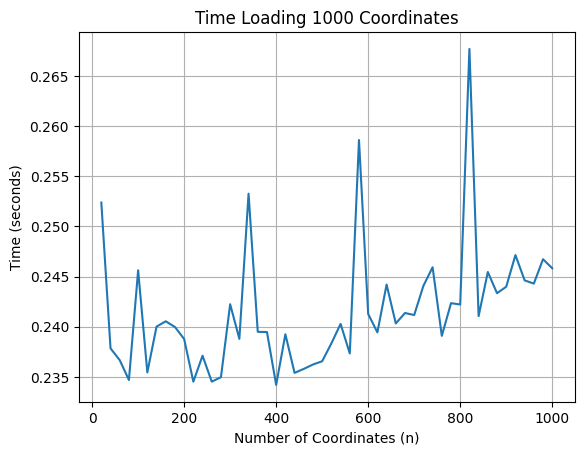

In [30]:
# Example 1000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 1000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)

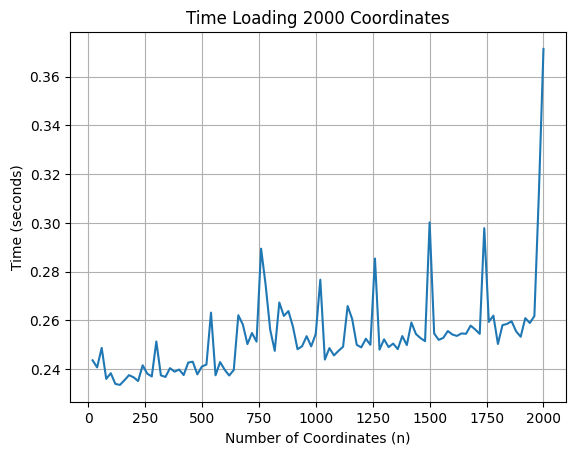

In [12]:
# Example 2000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 2000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)

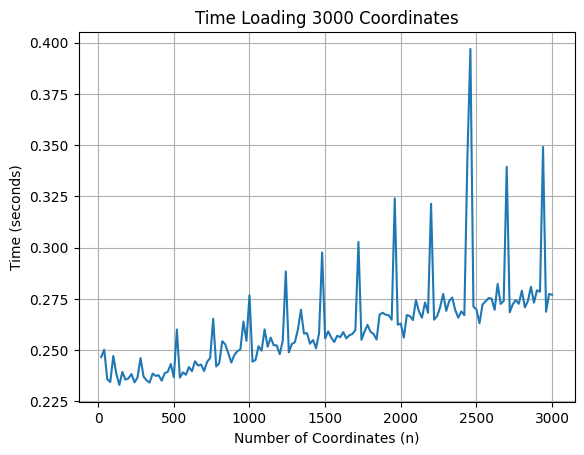

In [11]:
# Example 3000
file_path = "ECATEPEC.json"  # Replace with your file path
upper_bound = 3000  # Maximum number of coordinates
step_size = 20  # Increment between measurements

plot_time_vs_step_size(file_path, upper_bound, step_size)

# Librería rapidjson en C++ para deserializar solo coordenadas

Para este ejemplo fue necesario ajustar la presicion para leer las coordenadas, ademas de que el tiempo medido de la carga de datos se vacia en un .txt para despues graficarlo, igual que en el ejemplo de python hay un stephsize para mejorar la calidad de la grafica final

In [ ]:
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <iomanip> // Include for setting precision
#include <chrono>  // Include for measuring time
#include "rapidjson/document.h"
#include "rapidjson/istreamwrapper.h"

using namespace rapidjson;
using namespace std;
using namespace std::chrono;

// Define a struct for the coordinates
struct Coordinate {
    double latitude;
    double longitude;
    bool isMarker; // Add a flag to indicate if it's a marker
};

using Coordinates = vector<Coordinate>;

In [ ]:
Coordinates parseCoordinates(const string& filePath, int numObjects) {
    ifstream ifs(filePath);
    if (!ifs.is_open()) {
        throw runtime_error("Could not open file");
    }

    IStreamWrapper isw(ifs);
    Document doc;
    doc.ParseStream(isw);

    Coordinates coordinates;
    int objectsParsed = 0;

    // Check if the document is an array
    if (doc.IsArray()) {
        for (const auto& featureCollection : doc.GetArray()) {
            if (featureCollection.HasMember("features") && featureCollection["features"].IsArray()) {
                for (const auto& feature : featureCollection["features"].GetArray()) {
                    if (feature.HasMember("geometry") && feature["geometry"].HasMember("coordinates")) {
                        coordinates.push_back({0.0, 0.0, true}); // Add a marker coordinate
                        const auto& coords = feature["geometry"]["coordinates"].GetArray();
                        for (const auto& coord : coords) {
                            coordinates.push_back({coord[0].GetDouble(), coord[1].GetDouble(), false});
                        }
                        objectsParsed++;
                        if (objectsParsed >= numObjects) {
                            return coordinates;
                        }
                    }
                }
            }
        }
    }

    return coordinates;
}

In [ ]:
int main() {
    string filePath = "ECATEPEC.json";
    int maxNumObjects = 2000; // Maximum number of objects to load
    int stepSize = 100; // Step size for the number of objects to load

    ofstream outFile("measurements.txt");
    if (!outFile.is_open()) {
        cerr << "Error: Could not open measurements file for writing" << endl;
        return 1;
    }

    outFile << "NumObjects,Time(ms)" << endl; // Header for the CSV file

    for (int numObjects = stepSize; numObjects <= maxNumObjects; numObjects += stepSize) {
        try {
            auto start = high_resolution_clock::now();
            Coordinates coordinates = parseCoordinates(filePath, numObjects);
            auto end = high_resolution_clock::now();
            auto duration = duration_cast<milliseconds>(end - start).count();

            outFile << numObjects << "," << duration << endl;

            // Print the coordinates with six decimal places
            cout << "Loaded " << numObjects << " objects in " << duration << " ms" << endl;
        } catch (const exception& e) {
            cerr << "Error: " << e.what() << endl;
            break;
        }
    }

    outFile.close();
    return 0;
}


In [ ]:
Funcion en python para graficar los resultados guardados en el measurements.txt

In [35]:
import matplotlib.pyplot as plt
import csv

def plot_time_vs_step_size(file_path):
    """Plots the time it takes to load n coordinates from a CSV file.

    Args:
        file_path (str): The path to the CSV file.
    """

    n_values = []
    times = []

    # Read the CSV file
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            n_values.append(int(row[0]))
            times.append(float(row[1]) / 1000)  # Convert milliseconds to seconds

    plt.plot(n_values, times)
    plt.xlabel("Number of Objects")
    plt.ylabel("Time (seconds)")
    plt.title("Time to Load Coordinates from txt")
    plt.grid(True)
    plt.show()


Ejecutamos las pruebas (1000, 2000, 3000)

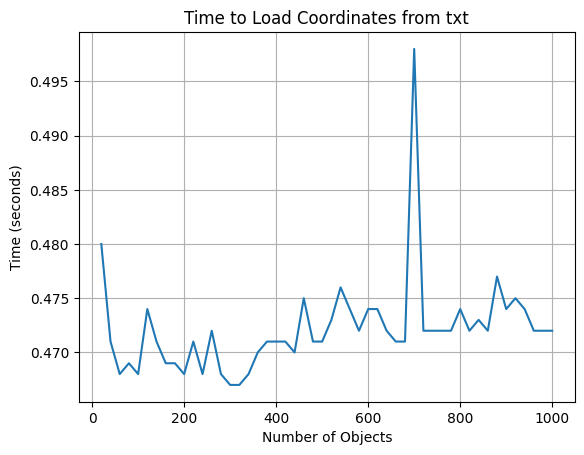

In [42]:
# Example 1000
file_path = 'measurements.txt'
plot_time_vs_step_size(file_path)

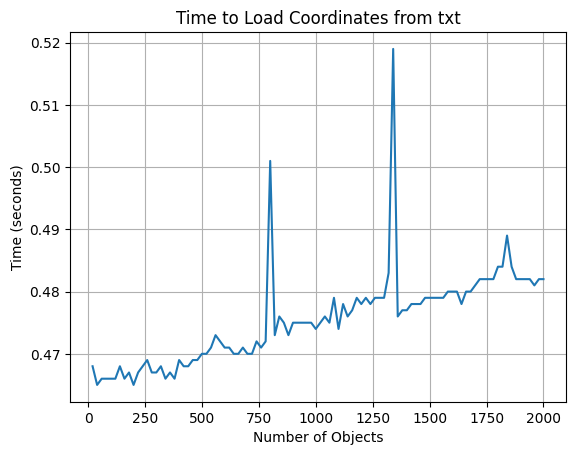

In [41]:
# Example 2000
file_path = 'measurements.txt'
plot_time_vs_step_size(file_path)

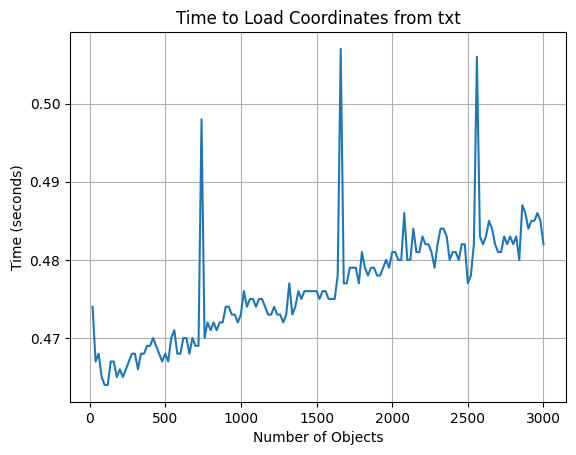

In [43]:
# Example 3000
file_path = 'measurements.txt'
plot_time_vs_step_size(file_path)